*Submitted By:*

**Md. Aukerul Moin Shuvo**


**Roll: 1603061**

***CSE, RUET.***




**Mounting the Drive**

# **Lab** - ***01***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the libraries**

In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage import data, filters
from skimage.morphology import *

**Channel Separation**

****

Text(0.5, 1.0, 'Channel 3')

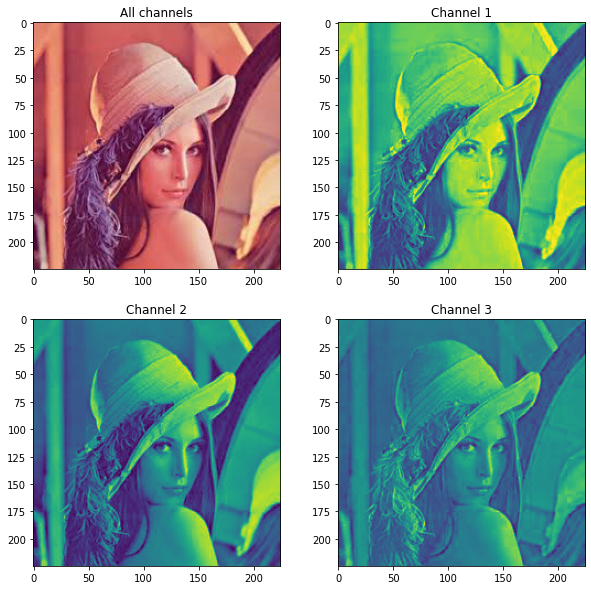

In [4]:
img = Image.open(r"/content/drive/My Drive/DIP/lina.jpg")
img = np.asarray(img)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('All channels')


plt.subplot(2,2,2)
plt.imshow(img[:,:,0])
plt.title('Channel 1')

plt.subplot(2,2,3)
plt.imshow(img[:,:,1])
plt.title('Channel 2')

plt.subplot(2,2,4)
plt.imshow(img[:,:,2])
plt.title('Channel 3')

**Histogram of Separated Channels**

Text(0.5, 1.0, 'Histogram of Channel 3')

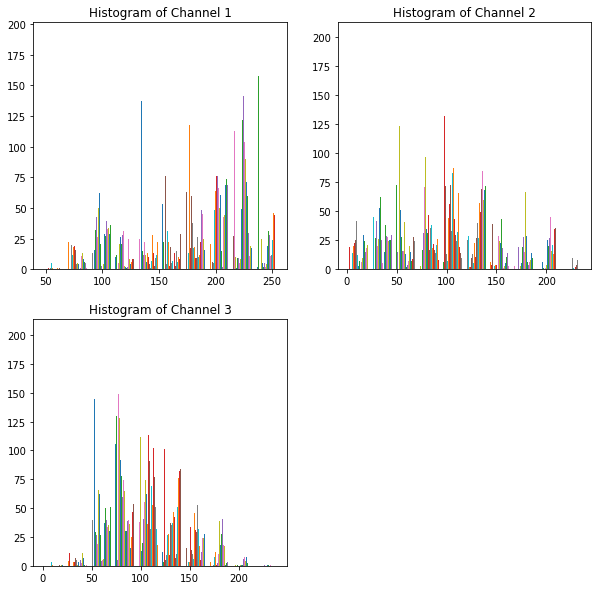

In [5]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(img[:,:,0])
plt.title('Histogram of Channel 1')


plt.subplot(2,2,2)
plt.hist(img[:,:,1])
plt.title('Histogram of Channel 2')

plt.subplot(2,2,3)
plt.hist(img[:,:,2])
plt.title('Histogram of Channel 3')

**Image Invertion**

Text(0.5, 1.0, 'Inverted Image')

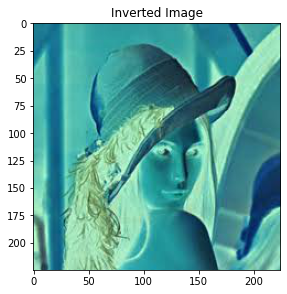

In [6]:
Height = img.shape[0]
Width = img.shape[1]
Channels = img.shape[2]

Size = (Height, Width, Channels)
Inverted_Image = np.zeros(Size, np.uint8)
for x in range(0, Height):
  for y in range(0, Width):
    for z in range(0, Channels):
      Inverted_Image[x,y,z] = 255 - img[x,y,z]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(Inverted_Image)
plt.title('Inverted Image')

**Image Segmentation Using Threshhold**

In [7]:
red_img = img[:,:,0]
Segmented_Image = np.zeros(Size, np.uint8)
for x in range(0, Height):
  for y in range(0, Width):
    if img[x, y, 0] > 245:
      Segmented_Image[x, y, 0] = 255

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(Segmented_Image)
plt.title('Segmented Image on Red Channel')



Text(0.5, 1.0, 'Segmented Image on Red Channel')

**Generating Histogram Manually**

Image Size: 1100 1100


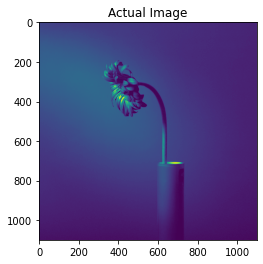

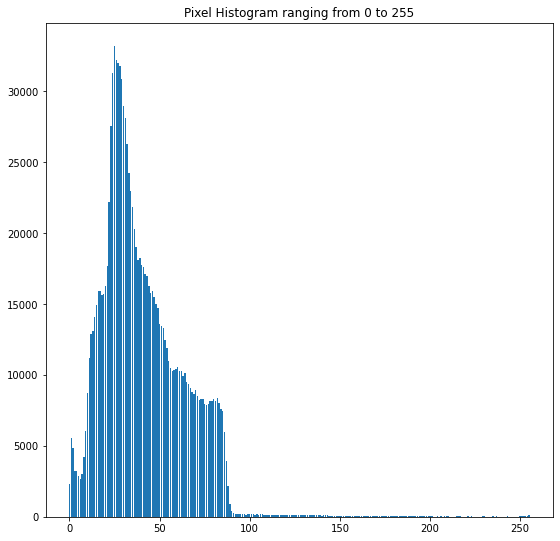

In [8]:

im = Image.open(r"/content/drive/My Drive/DIP/flower.jpg")
image = ImageOps.grayscale(im)
plt.imshow(image)
plt.title('Actual Image')
a, b = image.size
print("Image Size:",a,b)
pix = dict()
val = 0

for i in range(0, 256):
  pix[i] = val

for i in range(0, a):
  for j in range(0, b):
    cord = i, j
    v = image.getpixel(cord)
    pix[v] = pix[v] + 1


plt.figure(figsize=(20, 20))
pos = np.arange(len(pix.keys()))
width = 5.0     

ax = plt.axes()
ax.set_xticks(pos + (width))

plt.subplot(2,2,1)
plt.bar(pix.keys(), pix.values())
plt.title('Pixel Histogram ranging from 0 to 255')
plt.show()

# **Lab** - *02*

Histogram Equalization using PDF & CDF

In [9]:

smallest = np.amin(image)
biggest = np.amax(image)

pixel_values = pix.values()
total = sum(pixel_values)
print("Maximum pixel value= ", biggest)
print("Total Values: ", total)

pdf_pix = dict()
cdf_pix = dict()
pdf_pix = {key: (pix[key] / total) for key in pix.keys()}

cdf_pix[0] = pdf_pix[0]
for i in range(1, 256):
  cdf_pix[i] = ( cdf_pix[i-1] + pdf_pix[i] ) 
  

print("The original pixel values : " + str(pix))
print("The pdf pixel values : " + str(pdf_pix))
print("The pdf pixel values : " + str(cdf_pix))


for i in range(0, biggest + 1):
  cdf_pix[i] = cdf_pix[i] * biggest 

print("The pdfcdf * biggest pixel values : " + str(cdf_pix))


plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.bar(pix.keys(), pix.values())
plt.title('Pixel Histogram ranging from 0 to 255')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.bar(cdf_pix.keys(), cdf_pix.values())
plt.title('Histogram Equalization')
plt.show()


Maximum pixel value=  255
Total Values:  1210000
The original pixel values : {0: 2342, 1: 5574, 2: 4847, 3: 3229, 4: 3242, 5: 2902, 6: 2668, 7: 2998, 8: 4190, 9: 6048, 10: 8726, 11: 11220, 12: 12903, 13: 13079, 14: 14104, 15: 14918, 16: 15945, 17: 15913, 18: 15619, 19: 15719, 20: 16267, 21: 17649, 22: 22168, 23: 27509, 24: 31267, 25: 33168, 26: 32223, 27: 31994, 28: 31739, 29: 30882, 30: 28965, 31: 28073, 32: 26289, 33: 24222, 34: 22927, 35: 21800, 36: 20277, 37: 19007, 38: 18067, 39: 18262, 40: 17732, 41: 17606, 42: 17121, 43: 16989, 44: 16255, 45: 15756, 46: 15926, 47: 15464, 48: 14993, 49: 14687, 50: 13609, 51: 13424, 52: 13298, 53: 12471, 54: 11906, 55: 10961, 56: 10494, 57: 10284, 58: 10376, 59: 10413, 60: 10524, 61: 10248, 62: 10258, 63: 9923, 64: 10105, 65: 9526, 66: 9339, 67: 9067, 68: 8766, 69: 8622, 70: 8940, 71: 8536, 72: 8244, 73: 8287, 74: 8285, 75: 7967, 76: 7882, 77: 7937, 78: 8151, 79: 8130, 80: 8299, 81: 8175, 82: 8351, 83: 8010, 84: 7611, 85: 7438, 86: 5951, 87: 3942,

*Image Compression-DCT*

**ZigZag**

In [10]:
# Zigzag scan of a matrix
# Argument is a two-dimensional matrix of any size,
# not strictly a square one.
# Function returns a 1-by-(m*n) array,
# where m and n are sizes of an input matrix,
# consisting of its items scanned by a zigzag method.
#


import numpy as np

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output




# Inverse zigzag scan of a matrix
# Arguments are: a 1-by-m*n array, 
# where m & n are vertical & horizontal sizes of an output matrix.
# Function returns a two-dimensional matrix of defined sizes,
# consisting of input array items gathered by a zigzag method.
#



def inverse_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output

***Run Length Encoding***

In [11]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import math




def get_run_length_encoding(image):
    i = 0
    skip = 0
    stream = []    
    bitstream = ""
    image = image.astype(int)
    while i < image.shape[0]:
        if image[i] != 0:            
            stream.append((image[i],skip))
            bitstream = bitstream + str(image[i])+ " " +str(skip)+ " "
            skip = 0
        else:
            skip = skip + 1
        i = i + 1

    return bitstream

# defining block size
block_size = 8

# Quantization Matrix 
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])

# reading image in grayscale style
img = cv2.imread(r"/content/drive/My Drive/DIP/jd.jpg", cv2.IMREAD_GRAYSCALE)

#You can try with this matrix to understand working of DCT
#img = np.array([[255,255,227,204,204,203,192,217],[215,189,167,166,160,135,167,244],[169,115,99,99,99,82,127,220],[146,90,86,88,84,63,195,189],[255,255,231,239,240,182,251,232],[255,255,21,245,226,169,229,247],[255,255,222,251,174,209,174,163],[255,255,221,184,205,248,249,220]])


# get size of the image
[h , w] = img.shape



# No of blocks needed : Calculation

height = h
width = w
h = np.float32(h) 
w = np.float32(w) 

nbh = math.ceil(h/block_size)
nbh = np.int32(nbh)

nbw = math.ceil(w/block_size)
nbw = np.int32(nbw)


# Pad the image, because sometime image size is not dividable to block size
# get the size of padded image by multiplying block size by number of blocks in height/width

# height of padded image
H =  block_size * nbh

# width of padded image
W =  block_size * nbw

# create a numpy zero matrix with size of H,W
padded_img = np.zeros((H,W))

# copy the values of img into padded_img[0:h,0:w]
# for i in range(height):
#         for j in range(width):
#                 pixel = img[i,j]
#                 padded_img[i,j] = pixel

# or this other way here
padded_img[0:height,0:width] = img[0:height,0:width]

cv2.imwrite(r"/content/drive/My Drive/DIP/uncompressed.bmp", np.uint8(padded_img))



# start encoding:
# divide image into block size by block size (here: 8-by-8) blocks
# To each block apply 2D discrete cosine transform
# reorder DCT coefficients in zig-zag order
# reshaped it back to block size by block size (here: 8-by-8)

for i in range(nbh):
    
        # Compute start and end row index of the block
        row_ind_1 = i*block_size                
        row_ind_2 = row_ind_1+block_size
        
        for j in range(nbw):
            
            # Compute start & end column index of the block
            col_ind_1 = j*block_size                       
            col_ind_2 = col_ind_1+block_size
                        
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
                       
            # apply 2D discrete cosine transform to the selected block                       
            DCT = cv2.dct(block)            

            DCT_normalized = np.divide(DCT,QUANTIZATION_MAT).astype(int)            
            
            # reorder DCT coefficients in zig zag order by calling zigzag function
            # it will give you a one dimentional array
            reordered = zigzag(DCT_normalized)

            # reshape the reorderd array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(reordered, (block_size, block_size)) 
            
            # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped                        


cv2_imshow((padded_img))

arranged = padded_img.flatten()

# Now RLE encoded data is written to a text file (You can check no of bytes in text file is very less than no of bytes in the image
# THIS IS COMPRESSION WE WANTED, NOTE THAT ITS JUST COMPRESSION DUE TO RLE, YOU CAN COMPRESS IT FURTHER USING HUFFMAN CODES OR MAY BE 
# REDUCING MORE FREQUENCY COEFFICIENTS TO ZERO)

bitstream = get_run_length_encoding(arranged)

# Two terms are assigned for size as well, semicolon denotes end of image to reciever
bitstream = str(padded_img.shape[0]) + " " + str(padded_img.shape[1]) + " " + bitstream + ";"

# Written to image.txt
file1 = open(r"/content/drive/My Drive/DIP/image.txt","w")
file1.write(bitstream)
file1.close()

cv2.waitKey(0)
cv2.destroyAllWindows()


***Decoding***

In [13]:
import cv2
import numpy as np
import math
 

 
QUANTIZATION_MAT = np.array([[16,11,10,16,24,40,51,61],[12,12,14,19,26,58,60,55],[14,13,16,24,40,57,69,56 ],[14,17,22,29,51,87,80,62],[18,22,37,56,68,109,103,77],[24,35,55,64,81,104,113,92],[49,64,78,87,103,121,120,101],[72,92,95,98,112,100,103,99]])
 
# defining block size
block_size = 8
 
# Reading image.txt to decode it as image
with open(r"/content/drive/My Drive/DIP/image.txt", 'r') as myfile:
    image=myfile.read()
 
# spplits into tokens seperated by space characters
details = image.split()
 
# just python-crap to get integer from tokens : h and w are height and width of image (first two items)
h = int(''.join(filter(str.isdigit, details[0])))
w = int(''.join(filter(str.isdigit, details[1])))
 
# declare an array of zeros (It helps to reconstruct bigger array on which IDCT and all has to be applied)
array = np.zeros(h*w).astype(int)
 
 
# some loop var initialisation
k = 0
i = 2
x = 0
j = 0
 
 
# This loop gives us reconstructed array of size of image
 
while k < array.shape[0]:
# Oh! image has ended
    if(details[i] == ';'):
        break
# This is imp! note that to get negative numbers in array check for - sign in string
    if "-" not in details[i]:
        array[k] = int(''.join(filter(str.isdigit, details[i])))        
    else:
        array[k] = -1*int(''.join(filter(str.isdigit, details[i])))        
 
    if(i+3 < len(details)):
        j = int(''.join(filter(str.isdigit, details[i+3])))
 
    if j == 0:
        k = k + 1
    else:                
        k = k + j + 1        
 
    i = i + 2
 
array = np.reshape(array,(h,w))
 
# loop for constructing intensity matrix form frequency matrix (IDCT and all)
i = 0
j = 0
k = 0
 
# initialisation of compressed image
padded_img = np.zeros((h,w))
 
while i < h:
    j = 0
    while j < w:        
        temp_stream = array[i:i+8,j:j+8]                
        block = inverse_zigzag(temp_stream.flatten(), int(block_size),int(block_size))            
        de_quantized = np.multiply(block,QUANTIZATION_MAT)                
        padded_img[i:i+8,j:j+8] = cv2.idct(de_quantized)        
        j = j + 8        
    i = i + 8
 
# clamping to  8-bit max-min values
padded_img[padded_img > 255] = 255
padded_img[padded_img < 0] = 0
 
# compressed image is written into compressed_image.mp file
cv2.imwrite(r"/content/drive/My Drive/DIP/compressed_image.bmp",np.uint8(padded_img))
cv2_imshow((padded_img))
# DONE!

***Simple Lossy JPEG Compression***

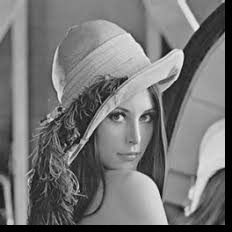

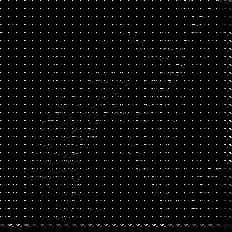

In [15]:
# Jpeg encoding

import cv2
import numpy as np
import math



# defining block size
block_size = 8

# reading image in grayscale
img = cv2.imread(r"/content/drive/My Drive/DIP/lina.jpg", 0)
cv2_imshow(img)

# get size of the image
[h , w] = img.shape


##################### step 1 #####################
# compute number of blocks by diving height and width of image by block size

# you need to convert h and w to float to get the right number
##h = np.float32(h)##### your code #####
##w = np.float32(w)##### your code #####

# to cover the whole image the number of blocks should be ceiling of the division of image size by block size
# at the end convert it to int

# number of blocks in height
nbh = math.ceil(h/block_size)##### your code #####
nbh = np.int32(nbh)

# number of blocks in width
nbw = math.ceil(w/block_size)##### your code #####
nbw = np.int32(nbw)

##################### step 2 #####################
# Padding the image, because sometime image size is not dividable to block size
# getting the size of padded image by multiplying block size by number of blocks in height/width

# height of padded image
H =  block_size * nbh##### your code #####

# width of padded image
W =  block_size * nbw##### your code #####

# create a numpy zero matrix with size of H,W
padded_img = np.zeros((H,W))

# copy the values of img  into padded_img[0:h,0:w]
for i in range(h):
        for j in range(w):
                pixel = img[i,j]
                padded_img[i,j] = pixel ##### your code #####

# or this other way here
#padded_img[0:h,0:w] = img[0:h,0:w]

cv2_imshow((padded_img))

##################### step 3 #####################
# start encoding:
# divide image into block size by block size (here: 8-by-8) blocks
# To each block apply 2D discrete cosine transform
# reorder DCT coefficients in zig-zag order
# reshaped it back to block size by block size (here: 8-by-8)


# iterate over blocks
for i in range(nbh):
    
        # Compute start row index of the block
        row_ind_1 = i*block_size##### your code #####
        
        # Compute end row index of the block
        row_ind_2 = row_ind_1+block_size##### your code #####
        
        for j in range(nbw):
            
            # Compute start column index of the block
            col_ind_1 = j*block_size##### your code #####
            
            # Compute end column index of the block
            col_ind_2 = col_ind_1+block_size##### your code #####
            
            # select the current block we want to process using calculated indices
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
            
            # apply 2D discrete cosine transform to the selected block
            # you should use opencv dct function
            DCT = cv2.dct(block)##### your code #####
            
            # reorder DCT coefficients in zig zag order by calling zigzag function
            # it will give you a one dimentional array
            reordered = zigzag(DCT)##### your code #####
            
            # reshape the reorderd array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(reordered, (block_size, block_size))##### your code #####
            
            # copy reshaped matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2] = reshaped##### your code #####

cv2_imshow((padded_img))

##################### step 4 #####################
# write h, w, block_size and padded_img into txt files at the end of encoding

# write padded_img into 'encoded.txt' file. You can use np.savetxt function.
np.savetxt(r"/content/drive/My Drive/DIP/encoded.txt",padded_img)##### your code #####

# write [h, w, block_size] into size.txt. You can use np.savetxt function.

##################################################

cv2.waitKey(0)
cv2.destroyAllWindows()


***JPEG decoding***

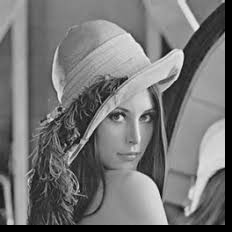

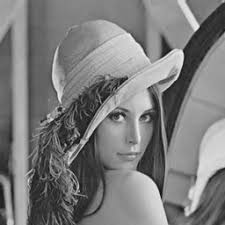

In [17]:
# Jpeg decoding

import cv2
import numpy as np
import math



##################### step 5 #####################
# load h, w, block_size and padded_img from txt files

# load 'encoded.txt' into padded_img matrix.
# You should use np.loadtxt if you have already used np.savetxt to save them.
padded_img = np.loadtxt(r"/content/drive/My Drive/DIP/encoded.txt")##### your code #####


# load 'size.txt' to get [h, w, block_size]
# You should use np.loadtxt if you have already used np.savetxt to save them.
[h, w, block_size] = np.loadtxt(r"/content/drive/My Drive/DIP/size.txt")##### your code #####

##################### step 6 #####################
# get the size of padded_img
[H, W] = padded_img.shape##### your code #####

# compute number of blocks by diving height and width of image by block size
# copy from step 1
# number of blocks in height
nbh = math.ceil(h/block_size)##### your code #####
nbh = np.int32(nbh)

# number of blocks in width
nbw = math.ceil(w/block_size)##### your code #####
nbw = np.int32(nbw)

##################### step 7 #####################
# start decoding:
# divide encoded image into block size by block size (here: 8-by-8) blocks
# reshape it to one dimensional array (here: 64)
# use inverse zig-zag to reorder the array into a block
# apply 2D inverse discrete cosine transform


# iterate over blocks
for i in range(nbh):

        # Compute start row index of the block, same as encoder
        row_ind_1 = i*int(block_size)##### your code #####

        # Compute end row index of the block, same as encoder
        row_ind_2 = row_ind_1+int(block_size)##### your code #####

        for j in range(nbw):

            # Compute start column index of the block, same as encoder
            col_ind_1 = j*int(block_size)##### your code #####

            # Compute end column index of the block, same as encoder
            col_ind_2 = col_ind_1+int(block_size)##### your code #####

            # select the current block we want to process using calculated indices
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]

            # reshape the 2D block (here: 8-by-8) to one dimensional array (here: 64)
            reshaped= np.reshape(block,(int(block_size)*int(block_size)))##### your code #####

            # use inverse_zigzag function to scan and reorder the array into a block
            reordered = inverse_zigzag(reshaped, int(block_size), int(block_size))##### your code #####

            # apply 2D inverse discrete cosine transform to the reordered matrix
            IDCT = cv2.idct(reordered)##### your code #####

            # copy IDCT matrix into padded_img on current block corresponding indices
            padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ] = IDCT##### your code #####


padded_img = np.uint8(padded_img)
cv2_imshow(padded_img)

##################### step 8 #####################
# get the original size (h by w) image from padded_img

decoded_img = padded_img[0:int(h),0:int(w)]##### your code #####

cv2_imshow(decoded_img)

##################################################

cv2.waitKey(0)
cv2.destroyAllWindows()

***LossLess JPEG Compression***

In [18]:
img = cv2.imread(r"/content/drive/My Drive/DIP/lina.jpg", cv2.IMREAD_GRAYSCALE)
##gray = rgb2gray(img);
[row , col] = img.shape

Selection-1 **********Prediction= A (Left)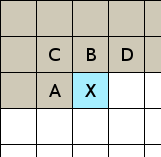

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


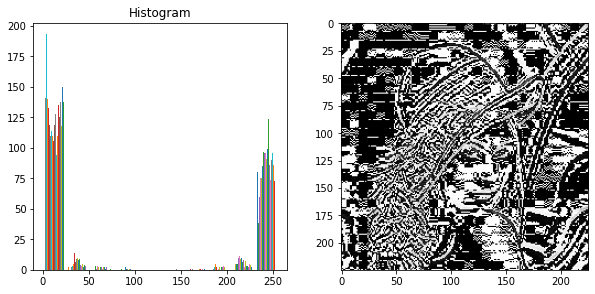

In [19]:
error1 = np.zeros([row, col]);
for i in range(row):
  for j in range(col):
    if(i == 1):
      if(j == 1):
        predict = 0;
      else:
        predict = img[i,j-1];
    else:
      predict = img[i-1,j];
    error1[i,j] = img[i,j] - predict;



plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error1)
plt.title('Histogram')

plt.subplot(2,2,2)

from PIL import Image
img1 = Image.fromarray(error1)
plt.imshow(img1)





Selection-2  *******Prediction= B(Upper)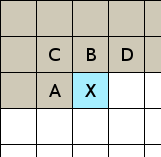

In [ ]:
error2 = np.zeros([row, col]);
for i in range(row):
  for j in range(col):
    if(j == 1):
      if(i == 1):
        predict = 0;
      else:
        predict = img[i-1,j];
    else:
      predict = img[i,j-1];
    error2[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error2)
plt.title('Histogram')

plt.subplot(2,2,2)
##plt.hist(error)
##plt.title('Histogram')
from PIL import Image
img2 = Image.fromarray(error2)
plt.imshow(img2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


Selection-3    ****Prediction=C (Upper Left)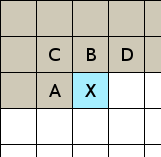

In [ ]:
error3 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img [i-1,j-1])
    error3[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error3)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img3 = Image.fromarray(error3)
plt.imshow(img3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


Selection-4 *******Prediction= A + B – C

In [ ]:
error4 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ img[i-1,j] - img [i-1,j-1])
    error4[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error4)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img4 = Image.fromarray(error4)
plt.imshow(img4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Selection-5 *********Prediction= A + (B – C)/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


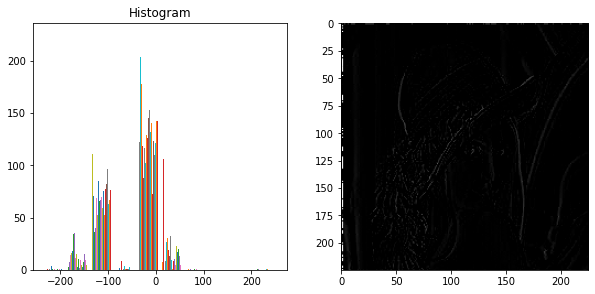

In [ ]:
error5 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ (img[i-1,j] - img [i-1,j-1])/2)
    error5[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error5)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img5 = Image.fromarray(error5)
plt.imshow(img5)

Selection-6 *******Prediction= B + (A – C)/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


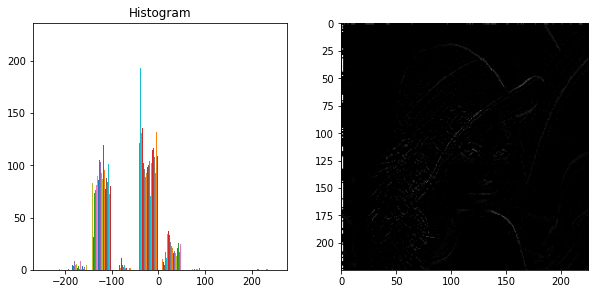

In [ ]:
error6 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i-1,j]+ (img[i,j-1] - img [i-1,j-1])/2)
    error6[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error6)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img6 = Image.fromarray(error6)
plt.imshow(img6)

Selection-7 ************* Prediction= (A + B)/*2*

In [ ]:
error7 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i-1,j]+ img[i,j-1])/2
    error7[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error7)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img7 = Image.fromarray(error7)
plt.imshow(img7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Selection-8 **************** Prediction= (A+B+C)/3

In [ ]:
error8 = np.zeros([row, col]);
for i in range(1, row):
  for j in range(1, col):
    if(i == 1 or j == 1):
      if(i != 1):
        predict = img[i-1,j];
      elif(j != 1):
        predict = img[i,j-1]
      else: 
        predict = 0;
    else:
      predict = (img[i,j-1]+ img[i-1,j] + img [i-1,j-1])/3
    error8[i,j] = img[i,j] - predict;
##error2 = jpg_loss_error_gray2(gray);
##error3 = jpg_loss_error_gray3(gray);


plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(error8)
plt.title('Histogram')

plt.subplot(2,2,2)
from PIL import Image
img8 = Image.fromarray(error8)
plt.imshow(img8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


Comparison

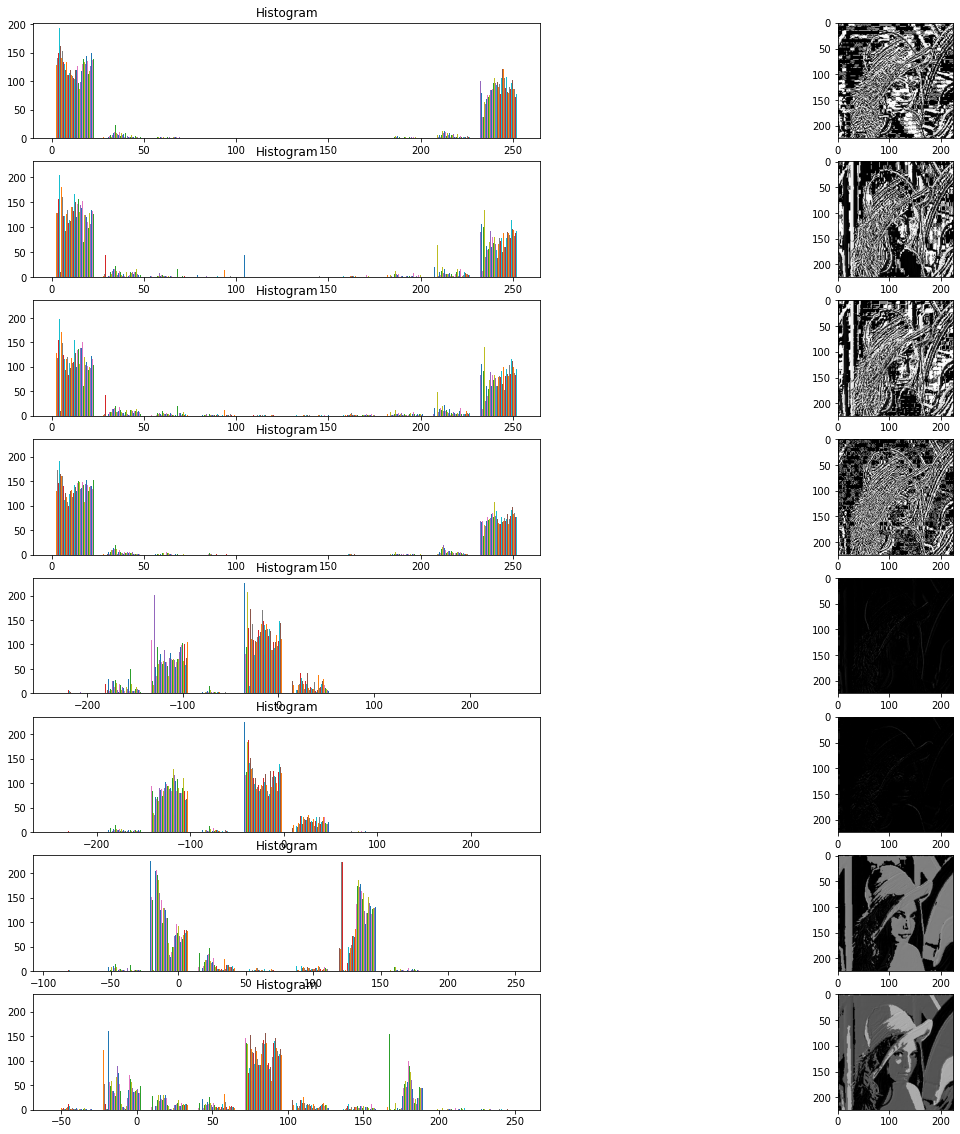

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(8,2,1)
plt.hist(error1)
plt.title('Histogram')

plt.subplot(8,2,2)

plt.imshow(img1)

plt.subplot(8,2,3)
plt.hist(error2)
plt.title('Histogram')

plt.subplot(8,2,4)
plt.imshow(img2)

plt.subplot(8,2,5)
plt.hist(error3)
plt.title('Histogram')

plt.subplot(8,2,6)
plt.imshow(img3)

plt.subplot(8,2,7)
plt.hist(error4)
plt.title('Histogram')

plt.subplot(8,2,8)
plt.imshow(img4)

plt.subplot(8,2,9)
plt.hist(error5)
plt.title('Histogram')

plt.subplot(8,2,10)
plt.imshow(img5)

plt.subplot(8,2,11)
plt.hist(error6)
plt.title('Histogram')

plt.subplot(8,2,12)
plt.imshow(img6)

plt.subplot(8,2,13)
plt.hist(error7)
plt.title('Histogram')

plt.subplot(8,2,14)
plt.imshow(img7)

plt.subplot(8,2,15)
plt.hist(error8)
plt.title('Histogram')

plt.subplot(8,2,16)
plt.imshow(img8)

***Temporal***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ubyte_scalars


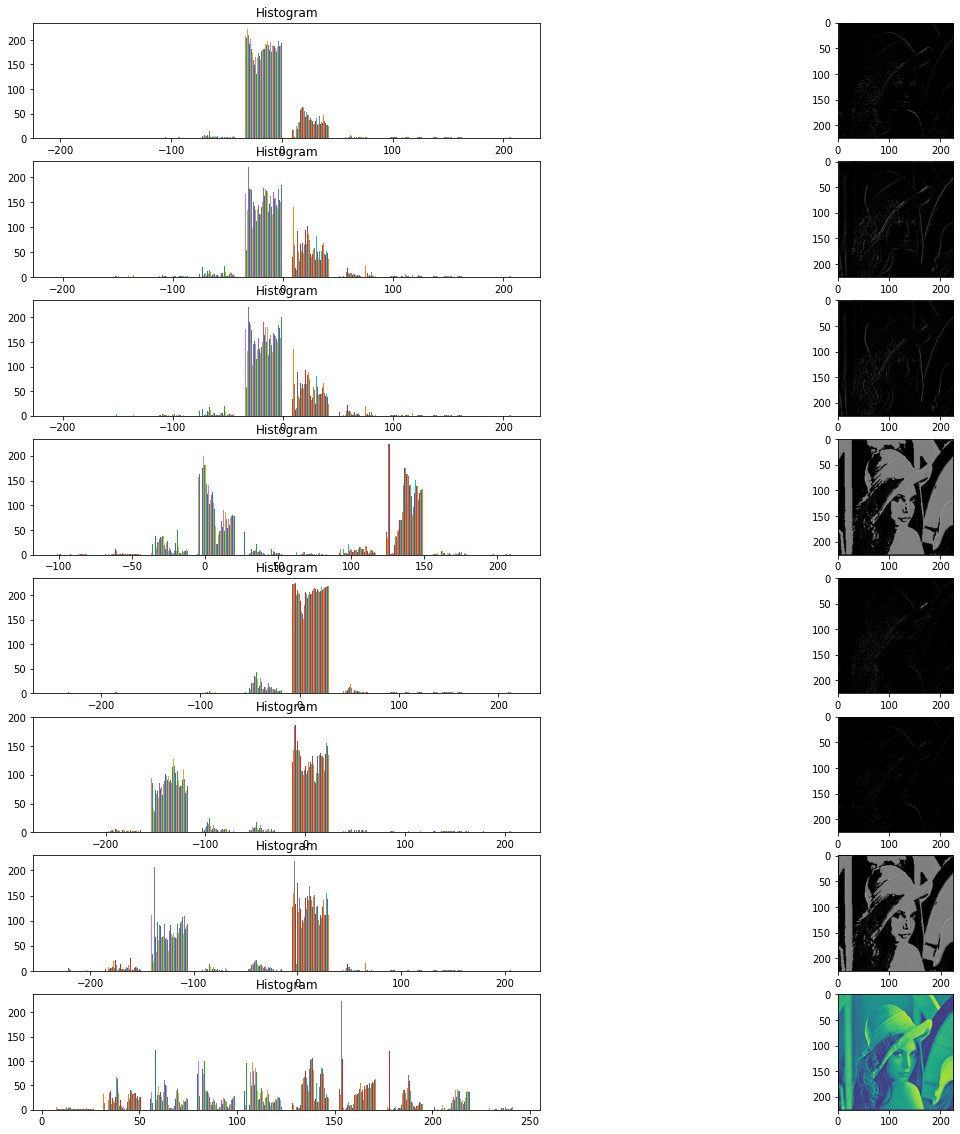

In [ ]:
##padding of 1
[row , col] = img.shape
row1 = row + 1
col1 = col + 1
color = 5
padded_img = np.full((row1, col1), color, dtype=np.uint8)

# compute center offset
xx = (row1 - row) // 2
yy = (col1 - col) // 2

# copy img image into center of result image
padded_img[yy:yy+col, xx:xx+row] = img

# view result
cv2_imshow(padded_img)

tempo1 = np.zeros([row1, col1])
tempo2 = np.zeros([row1, col1])
tempo3 = np.zeros([row1, col1])
tempo4 = np.zeros([row1, col1])
tempo5 = np.zeros([row1, col1])
tempo6 = np.zeros([row1, col1])
tempo7 = np.zeros([row1, col1])
tempo8 = np.zeros([row1, col1])
for i in range(2, row1):
  for j in range(2, col1):
    A = padded_img[i-1,j]
    B = padded_img[i,j-1]
    C = padded_img [i-1,j-1]
    tempo1[i, j] = A
    tempo2[i, j] = C
    tempo3[i, j] = B
    tempo4[i, j] = (A+B)/2
    tempo5[i, j] = A + B - C 
    tempo6[i, j] = A+((B-C)/2)
    tempo7[i, j] = B+(A-C)/2
    
plt.figure(figsize = (20,20))

plt.subplot(8,2,1)
plt.hist(padded_img  - tempo1)
plt.title('Histogram')

plt.subplot(8,2,2)
tempo_img1 = Image.fromarray(padded_img  - tempo1)
plt.imshow(tempo_img1)

plt.subplot(8,2,3)
plt.hist(padded_img  - tempo2)
plt.title('Histogram')

plt.subplot(8,2,4)
tempo_img2 = Image.fromarray(padded_img  - tempo2)
plt.imshow(tempo_img2)

plt.subplot(8,2,5)
plt.hist(padded_img  - tempo3)
plt.title('Histogram')

plt.subplot(8,2,6)
tempo_img3 = Image.fromarray(padded_img  - tempo3)
plt.imshow(tempo_img3)

plt.subplot(8,2,7)
plt.hist(padded_img  - tempo4)
plt.title('Histogram')

plt.subplot(8,2,8)
tempo_img4 = Image.fromarray(padded_img  - tempo4)
plt.imshow(tempo_img4)

plt.subplot(8,2,9)
plt.hist(padded_img  - tempo5)
plt.title('Histogram')

plt.subplot(8,2,10)
tempo_img5 = Image.fromarray(padded_img  - tempo5)
plt.imshow(tempo_img5)

plt.subplot(8,2,11)
plt.hist(padded_img  - tempo6)
plt.title('Histogram')

plt.subplot(8,2,12)
tempo_img6 = Image.fromarray(padded_img  - tempo6)
plt.imshow(tempo_img6)

plt.subplot(8,2,13)
plt.hist(padded_img  - tempo7)
plt.title('Histogram')

plt.subplot(8,2,14)
tempo_img7 = Image.fromarray(padded_img  - tempo7)
plt.imshow(img7)

plt.subplot(8,2,15)
plt.hist(padded_img)
plt.title('Histogram')

plt.subplot(8,2,16)
plt.imshow(padded_img) 

***LOCO I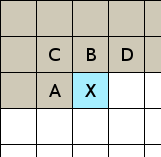***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


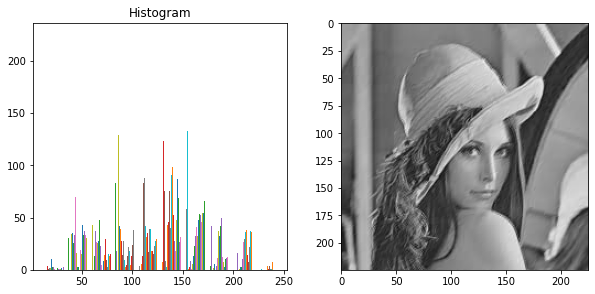

In [ ]:
loco = np.zeros([row, col]);
for i in range(row):
  for j in range(col):
    A = img[i-1,j]
    B = img[i,j-1]
    C = img [i-1,j-1]
    if(C >= max(A,B)):
      loco[i,j] = min(A, B)
    elif(C <= min(A,B)):
      loco[i,j] = max(A,B)
    else:
      loco[i,j] = A + B - C
    



plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(loco)
plt.title('Histogram')

plt.subplot(2,2,2)

from PIL import Image
imgloco = Image.fromarray(loco)
plt.imshow(imgloco)





Bits per Pixel

In [ ]:
import os

file_name = r"/content/drive/My Drive/DIP/lina.jpg"

file_stats = os.stat(file_name)
print(file_stats)
print(f'File Size in Bytes is {file_stats.st_size}')
print(f'File Size in MegaBytes is {file_stats.st_size / (1024 * 1024)}')
img = Image.open(r"/content/drive/My Drive/DIP/lina.jpg")
img = cv2.imread(r"/content/drive/My Drive/DIP/lina.jpg", cv2.IMREAD_GRAYSCALE)
[row , col] = img.shape
bpp = (file_stats.st_size*8)/(row*col)
print(f'Bits per pixel in original image ={bpp}')

os.stat_result(st_mode=33152, st_ino=50, st_dev=49, st_nlink=1, st_uid=0, st_gid=0, st_size=8017, st_atime=1624385977, st_mtime=1609926060, st_ctime=1609926081)
File Size in Bytes is 8017
File Size in MegaBytes is 0.007645606994628906
Bits per pixel in original image =1.266883950617284


***Entropy of an Image***

In [ ]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

In [ ]:
colorIm=Image.open(r"/content/drive/My Drive/DIP/lina.jpg")
greyIm=colorIm.convert('L')
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)

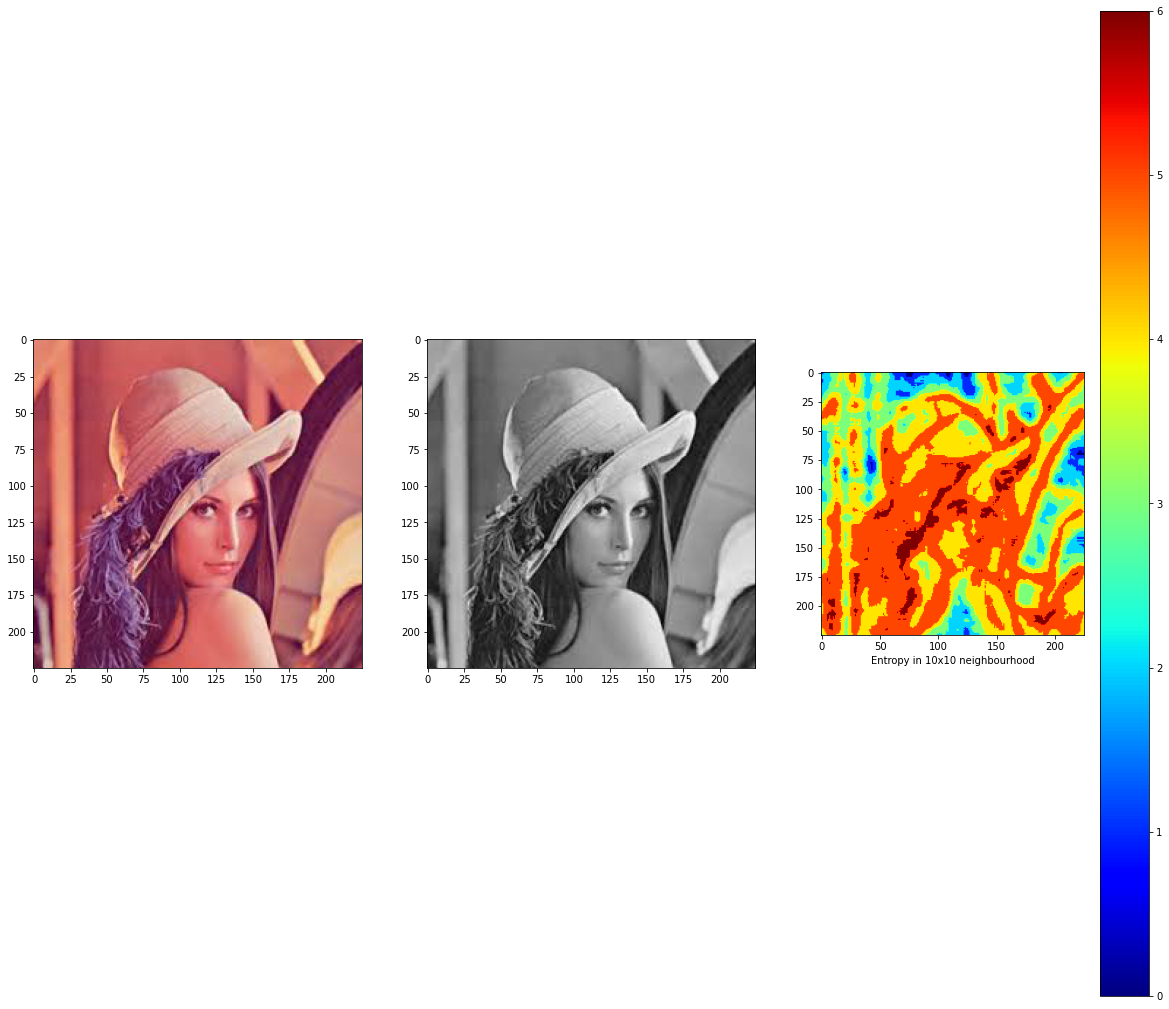

In [ ]:
N=5
S=greyIm.shape
E=np.array(greyIm)
for row in range(S[0]):
  for col in range(S[1]):
    Lx=np.max([0,col-N])
    Ux=np.min([S[1],col+N])
    Ly=np.max([0,row-N])
    Uy=np.min([S[0],row+N])
    region=greyIm[Ly:Uy,Lx:Ux].flatten()
    E[row,col]=entropy(region)
    
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(colorIm)

plt.subplot(1,3,2)
plt.imshow(greyIm, cmap=plt.cm.gray)

plt.subplot(1,3,3)
plt.imshow(E, cmap=plt.cm.jet)
plt.xlabel('Entropy in 10x10 neighbourhood')
plt.colorbar()

plt.show()

In [ ]:
colorIm= tempo_img4
greyIm=colorIm.convert('L')
##colorIm=np.array(colorIm)
greyIm=np.array(greyIm)

N=5
S=greyIm.shape
E=np.array(greyIm)
for row in range(S[0]):
  for col in range(S[1]):
    Lx=np.max([0,col-N])
    Ux=np.min([S[1],col+N])
    Ly=np.max([0,row-N])
    Uy=np.min([S[0],row+N])
    region=greyIm[Ly:Uy,Lx:Ux].flatten()
    E[row,col]=entropy(region)

plt.figure(figsize = (20,20))


plt.subplot(1,3,2)
plt.imshow(greyIm, cmap=plt.cm.gray)

plt.subplot(1,3,3)
plt.imshow(E, cmap=plt.cm.jet)
plt.xlabel('Entropy in 10x10 neighbourhood')
plt.colorbar()

plt.show()




True

# Image Segmentation

***Edge Detection using Gradient Operators: Prewitt Operator & Sobel Operator***

Vertical Filter:
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
Horizontal Filter:
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Sobel Filter along Vertical axis:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel Filter along Horizontal axis:
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


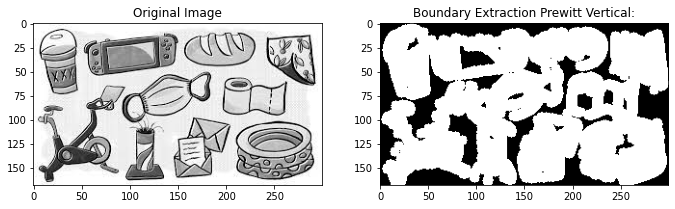

In [ ]:
# Reading the image
img = cv2.imread(r"/content/drive/My Drive/DIP/multiple_object.jpg", 0)
 
#shape of the input image
m, n = img.shape
 
#Vertical Edge Detection Filter
vertical_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#Horizontal Filter
horizontal_filter= np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

#Sobel Filter Vertical & Horizontal
sobel_filter_V =  np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_filter_H =  np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

#Displaying the Filters
print(f'Vertical Filter:\n {vertical_filter}')
print(f'Horizontal Filter:\n {horizontal_filter}')
print(f'Sobel Filter along Vertical axis:\n {sobel_filter_V}')
print(f'Sobel Filter along Horizontal axis:\n {sobel_filter_H}')

# Convolution process through every pixel of the image
vertical_img = np.zeros([m, n])
horizontal_img =  np.zeros([m, n])
sob_V_img =  np.zeros([m, n])
sob_H_img =  np.zeros([m, n])
for i in range(1, m-1):
  for j in range(1, n-1):
    #Vertical Convolution Window
    v = img[i-1, j-1]*vertical_filter[0, 0]+img[i-1, j]*vertical_filter[0, 1]+img[i-1, j + 1]*vertical_filter[0, 2]+img[i, j-1]*vertical_filter[1, 0]+ img[i, j]*vertical_filter[1, 1]+img[i, j + 1]*vertical_filter[1, 2]+img[i + 1, j-1]*vertical_filter[2, 0]+img[i + 1, j]*vertical_filter[2, 1]+img[i + 1, j + 1]*vertical_filter[2, 2]
    
    #Horizontal Convolution Window
    h = img[i-1, j-1]*horizontal_filter[0, 0]+img[i-1, j]*horizontal_filter[0, 1]+img[i-1, j + 1]*horizontal_filter[0, 2]+img[i, j-1]*horizontal_filter[1, 0]+ img[i, j]*horizontal_filter[1, 1]+img[i, j + 1]*horizontal_filter[1, 2]+img[i + 1, j-1]*horizontal_filter[2, 0]+img[i + 1, j]*horizontal_filter[2, 1]+img[i + 1, j + 1]*horizontal_filter[2, 2]
    
    #Sobel Vertical Convolution Window
    sob_V = img[i-1, j-1]*sobel_filter_V[0, 0]+img[i-1, j]*sobel_filter_V[0, 1]+img[i-1, j + 1]*sobel_filter_V[0, 2]+img[i, j-1]*sobel_filter_V[1, 0]+ img[i, j]*sobel_filter_V[1, 1]+img[i, j + 1]*sobel_filter_V[1, 2]+img[i + 1, j-1]*sobel_filter_V[2, 0]+img[i + 1, j]*sobel_filter_V[2, 1]+img[i + 1, j + 1]*sobel_filter_V[2, 2]

    #Sobel Horizontal Convolution Window
    sob_H = img[i-1, j-1]*sobel_filter_H[0, 0]+img[i-1, j]*sobel_filter_H[0, 1]+img[i-1, j + 1]*sobel_filter_H[0, 2]+img[i, j-1]*sobel_filter_H[1, 0]+ img[i, j]*sobel_filter_H[1, 1]+img[i, j + 1]*sobel_filter_H[1, 2]+img[i + 1, j-1]*sobel_filter_H[2, 0]+img[i + 1, j]*sobel_filter_H[2, 1]+img[i + 1, j + 1]*sobel_filter_H[2, 2]



    #Storing the convolution results to get image from it
    if v > 48: vertical_img[i, j]= 1   # Thresholding at 48
    
    if h > 48: horizontal_img[i, j]= 1
    
    if sob_V > 48: sob_V_img[i, j]= 1
    
    if sob_H > 48: sob_H_img[i, j]= 1
    
    
 
#Plotting the images for comparison
plt.figure(figsize = (30,30))   
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

vertical_img = vertical_img.astype(np.uint8)
plt.subplot(1,5,2)
plt.title('Vertical Edge Detection Filter:')
plt.imshow(vertical_img, cmap='gray')

horizontal_img = horizontal_img.astype(np.uint8)
plt.subplot(1,5,3)
plt.title('Horizontal Edge Detection Filter:')
plt.imshow(horizontal_img, cmap='gray')

sob_V_img = sob_V_img.astype(np.uint8)
plt.subplot(1,5,4)
plt.title('Gradient Edges along Vertical axis:')
plt.imshow(sob_V_img, cmap='gray')

sob_H_img = sob_H_img.astype(np.uint8)
plt.subplot(1,5,5)
plt.title('Gradient Edges along Horizontal axis:')
plt.imshow(sob_H_img, cmap='gray')


#Plotting the images for comparison
selem = star(7)
plt.figure(figsize = (30,30))   
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,5,2)
eroded_star = erosion(vertical_img, selem)
plt.title('Boundary Extraction Prewitt Vertical:')
selem = disk(5)
dilated_disk = dilation((vertical_img-eroded_star), selem)
plt.imshow(dilated_disk, cmap='gray')




***Edge Detection: Compass Operators***

In [ ]:
#Compass Operators
compass_filter1 = np.array([[1,1,0],[1,0,-1],[0,-1,-1]])
compass_filter2= np.array([[0,1,1],[-1,0,1],[-1,-1,0]])
compass_filter3=  np.array([[0,-1,-1], [1,0,-1], [1,1,0]])
compass_filter4=  np.array([[-1,-1,0], [-1,0,1], [0,1,1]])

#Displaying the Filters
print(f'Compass Operator 1:\n {compass_filter1}')
print(f'Compass Operator 2:\n {compass_filter2}')
print(f'Compass Operator 3:\n {compass_filter3}')
print(f'Compass Operator 4:\n {compass_filter4}')

# Convolution process through every pixel of the image
com_img1 = np.zeros([m, n])
com_img2 =  np.zeros([m, n])
com_img3 =  np.zeros([m, n])
com_img4 =  np.zeros([m, n])
for i in range(1, m-1):
  for j in range(1, n-1):
    #Convolution Window for compass 1
    c1 = img[i-1, j-1]*compass_filter1[0, 0]+img[i-1, j]*compass_filter1[0, 1]+img[i-1, j + 1]*compass_filter1[0, 2]+img[i, j-1]*compass_filter1[1, 0]+ img[i, j]*compass_filter1[1, 1]+img[i, j + 1]*compass_filter1[1, 2]+img[i + 1, j-1]*compass_filter1[2, 0]+img[i + 1, j]*compass_filter1[2, 1]+img[i + 1, j + 1]*compass_filter1[2, 2]
    
    #Convolution Window for compass 2
    c2 = img[i-1, j-1]*compass_filter2[0, 0]+img[i-1, j]*compass_filter2[0, 1]+img[i-1, j + 1]*compass_filter2[0, 2]+img[i, j-1]*compass_filter2[1, 0]+ img[i, j]*compass_filter2[1, 1]+img[i, j + 1]*compass_filter2[1, 2]+img[i + 1, j-1]*compass_filter2[2, 0]+img[i + 1, j]*compass_filter2[2, 1]+img[i + 1, j + 1]*compass_filter2[2, 2]
    
    #Convolution Window for compass 3
    c3 = img[i-1, j-1]*compass_filter3[0, 0]+img[i-1, j]*compass_filter3[0, 1]+img[i-1, j + 1]*compass_filter3[0, 2]+img[i, j-1]*compass_filter3[1, 0]+ img[i, j]*compass_filter3[1, 1]+img[i, j + 1]*compass_filter3[1, 2]+img[i + 1, j-1]*compass_filter3[2, 0]+img[i + 1, j]*compass_filter3[2, 1]+img[i + 1, j + 1]*compass_filter3[2, 2]

    #Convolution Window for compass 4
    c4 = img[i-1, j-1]*compass_filter4[0, 0]+img[i-1, j]*compass_filter4[0, 1]+img[i-1, j + 1]*compass_filter4[0, 2]+img[i, j-1]*compass_filter4[1, 0]+ img[i, j]*compass_filter4[1, 1]+img[i, j + 1]*compass_filter4[1, 2]+img[i + 1, j-1]*compass_filter4[2, 0]+img[i + 1, j]*compass_filter4[2, 1]+img[i + 1, j + 1]*compass_filter4[2, 2]



    #Storing the convolution results to get image from it
    if c1 > 48: com_img1[i, j]= 1  # Thresholding at 48
    
    if c2 > 48: com_img2[i, j]= 1
    
    if c3 > 48: com_img3[i, j]= 1
    
    if c4 > 48: com_img4[i, j]= 1
    
    
 
#Plotting the images for comparison
plt.figure(figsize = (30,30))   
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

com_img1 = com_img1.astype(np.uint8)
plt.subplot(1,5,2)
plt.title('Compass Operator 1:')
plt.imshow(com_img1, cmap='gray')

com_img2 = com_img2.astype(np.uint8)
plt.subplot(1,5,3)
plt.title('Compass Operator 2:')
plt.imshow(com_img2, cmap='gray')

com_img3 = com_img3.astype(np.uint8)
plt.subplot(1,5,4)
plt.title('Compass Operator 3:')
plt.imshow(com_img3, cmap='gray')

com_img4 = com_img4.astype(np.uint8)
plt.subplot(1,5,5)
plt.title('Compass Operator 4:')
plt.imshow(com_img4, cmap='gray')

Compass Operator 1:
 [[ 1  1  0]
 [ 1  0 -1]
 [ 0 -1 -1]]
Compass Operator 2:
 [[ 0  1  1]
 [-1  0  1]
 [-1 -1  0]]
Compass Operator 3:
 [[ 0 -1 -1]
 [ 1  0 -1]
 [ 1  1  0]]
Compass Operator 4:
 [[-1 -1  0]
 [-1  0  1]
 [ 0  1  1]]


***Edge Detection: Laplacian Operator & Laplacian of Gaussian Operator(with & without Zero Crossing)***

In [ ]:
#Laplacian of Gaussian filter generation from the combined equation
def build_LoG_filter(shape=(3,3), sigma=0.4):
  m,n = [(ss-1.)/2. for ss in shape]
  y,x = np.ogrid[-m:m+1,-n:n+1]
  f = np.exp(-(x*x + y*y) / (2.*sigma*sigma))
  f = f / f.sum()
  f = f * (x*x + y*y - 2*sigma**2) / sigma**4
  return f - f.mean()

#Laplacian Operator
laplacian_filter= np.ones([3, 3], dtype = int)
laplacian_filter[1,1] = -8 

#Displaying the Filters
LoG_filter = build_LoG_filter(shape=(3, 3), sigma=0.4)
print(f'Laplacian Operator:\n {laplacian_filter}')
print(f'Laplacian of Gaussian Operator:\n {LoG_filter}')


#Convolution process through every pixel of the image
lap_img = np.zeros([m, n])
LoG_img = np.zeros([m, n])
LoG_img_zc = np.zeros([m, n])
lap_img_zc = np.zeros([m, n])
z_c_image = np.zeros([m, n])

for i in range(1, m-1):
  for j in range(1, n-1):
    #Convolution Window for Laplasian 
    lap = img[i-1, j-1]*laplacian_filter[0, 0]+img[i-1, j]*laplacian_filter[0, 1]+img[i-1, j + 1]*laplacian_filter[0, 2]+img[i, j-1]*laplacian_filter[1, 0]+ img[i, j]*laplacian_filter[1, 1]+img[i, j + 1]*laplacian_filter[1, 2]+img[i + 1, j-1]*laplacian_filter[2, 0]+img[i + 1, j]*laplacian_filter[2, 1]+img[i + 1, j + 1]*laplacian_filter[2, 2]


    #Convolution Window for Laplasian of Gaussian
    log = img[i-1, j-1]*LoG_filter[0, 0]+img[i-1, j]*LoG_filter[0, 1]+img[i-1, j + 1]*LoG_filter[0, 2]+img[i, j-1]*LoG_filter[1, 0]+ img[i, j]*LoG_filter[1, 1]+img[i, j + 1]*LoG_filter[1, 2]+img[i + 1, j-1]*LoG_filter[2, 0]+img[i + 1, j]*LoG_filter[2, 1]+img[i + 1, j + 1]*LoG_filter[2, 2]

    


    #Storing the convolution results to get image from it
    LoG_img_zc[i,j] = log
    lap_img_zc[i,j] = lap
    if lap > 48: lap_img[i,j] = 1
    if log > 48: LoG_img[i,j] = 1


#Plotting the images for comparison
plt.figure(figsize = (30,30))   
plt.subplot(1,5,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

lap_img = lap_img.astype(np.uint8)
plt.subplot(1,5,2)
plt.title('Effect of Laplacian Operator:')
plt.imshow(lap_img, cmap='gray')

LoG_img = LoG_img.astype(np.uint8)
plt.subplot(1,5,3)
plt.title('Effect of Laplacian of Gaussian Operator (No Zero Crossing):')
plt.imshow(LoG_img, cmap='gray')

for i in range(0, m-1):
  for j in range(0, n-1):
    if lap_img_zc[i][j]>0:
      if lap_img_zc[i+1][j] < 0 or lap_img_zc[i+1][j+1] < 0 or lap_img_zc[i][j+1] < 0:
        z_c_image[i,j] = 1
    elif LoG_img_zc[i][j] < 0:
      if lap_img_zc[i+1][j] > 0 or lap_img_zc[i+1][j+1] > 0 or lap_img_zc[i][j+1] > 0:
        z_c_image[i,j] = 1
z_c_image = z_c_image.astype(np.uint8)
plt.subplot(1,5,4)
plt.title('Zero-crossing of the Laplacian image:')
plt.imshow(z_c_image, cmap='gray')

z_c_image = np.zeros([m, n])

for i in range(0, m-1):
  for j in range(0, n-1):
    if LoG_img_zc[i][j]>0:
      if LoG_img_zc[i+1][j] < 0 or LoG_img_zc[i+1][j+1] < 0 or LoG_img_zc[i][j+1] < 0:
        z_c_image[i,j] = 1
    elif LoG_img_zc[i][j] < 0:
      if LoG_img_zc[i+1][j] > 0 or LoG_img_zc[i+1][j+1] > 0 or LoG_img_zc[i][j+1] > 0:
        z_c_image[i,j] = 1

z_c_image = z_c_image.astype(np.uint8)
plt.subplot(1,5,5)
plt.title('Zero-crossing of the Laplacian image:')
plt.imshow(z_c_image, cmap='gray')

Laplacian Operator:
 [[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]
Laplacian of Gaussian Operator:
 [[ 0.7947565   1.67385706  0.7947565 ]
 [ 1.67385706 -9.87445425  1.67385706]
 [ 0.7947565   1.67385706  0.7947565 ]]


***Canny Edge Detector***

Steps:
1. Smoothing by Gaussian Convolution
2. Differential Operators along x and y axis
3. Non-Maximum Suppression finds peaks in the image gradient
4. Hysteresis Thresholding locates edge strings

Smoothing Filter:
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
Sobel Filter along Vertical axis:
 [[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]
Sobel Filter along Horizontal axis:
 [[-0.125 -0.25  -0.125]
 [ 0.     0.     0.   ]
 [ 0.125  0.25   0.125]]


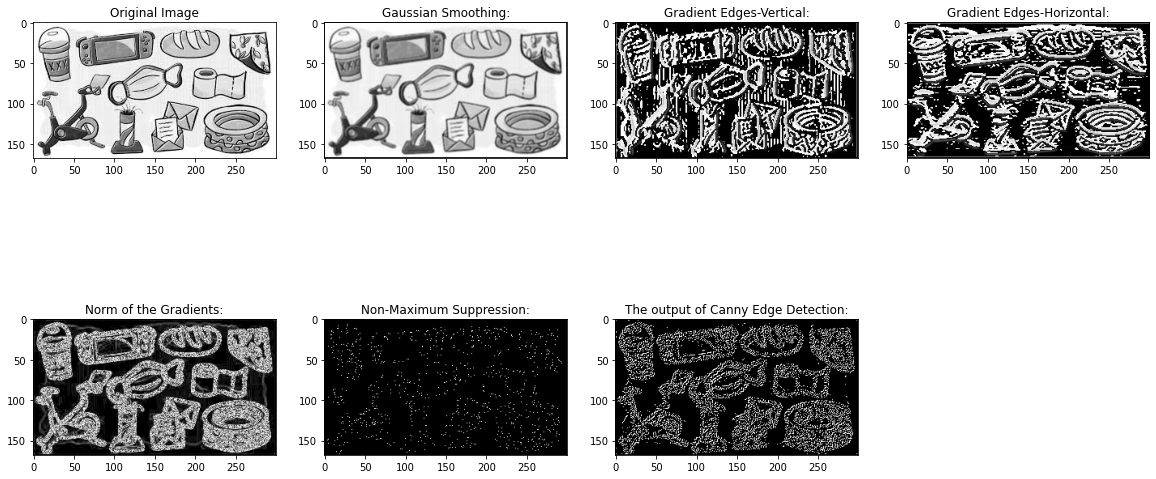

In [ ]:
#1. Gaussian Smoothing
smoothing_filter = np.array([[1,2,1], [2,4,2], [1,2,1]])/16
 
#Displaying the Filters
print(f'Smoothing Filter:\n {smoothing_filter}')
 
# Convolution process through every pixel of the image
smoothed_img = np.zeros([m, n])
 
for i in range(1, m-1):
  for j in range(1, n-1):
    #Smoothing Convolution Window
    smoothed = img[i-1, j-1]*smoothing_filter[0, 0]+img[i-1, j]*smoothing_filter[0, 1]+img[i-1, j + 1]*smoothing_filter[0, 2]+img[i, j-1]*smoothing_filter[1, 0]+ img[i, j]*smoothing_filter[1, 1]+img[i, j + 1]*smoothing_filter[1, 2]+img[i + 1, j-1]*smoothing_filter[2, 0]+img[i + 1, j]*smoothing_filter[2, 1]+img[i + 1, j + 1]*smoothing_filter[2, 2]
    
    #Storing the convolution results to get image from it
    smoothed_img[i, j]= smoothed
 
#2. Differential Operators(Sobel Operators) along x and y axis 
 
#Sobel Filter Vertical & Horizontal
sobel_filter_V =  np.array([[-1,0,1], [-2,0,2], [-1,0,1]])/8
sobel_filter_H =  np.array([[-1,-2,-1], [0,0,0], [1,2,1]])/8
#Displaying the Filters
print(f'Sobel Filter along Vertical axis:\n {sobel_filter_V}')
print(f'Sobel Filter along Horizontal axis:\n {sobel_filter_H}')
 
# Convolution process through every pixel of the image
for i in range(1, m-1):
  for j in range(1, n-1):
    #Sobel Vertical Convolution Window
    sob_V = smoothed_img[i-1, j-1]*sobel_filter_V[0, 0]+smoothed_img[i-1, j]*sobel_filter_V[0, 1]+smoothed_img[i-1, j + 1]*sobel_filter_V[0, 2]+smoothed_img[i, j-1]*sobel_filter_V[1, 0]+ smoothed_img[i, j]*sobel_filter_V[1, 1]+smoothed_img[i, j + 1]*sobel_filter_V[1, 2]+smoothed_img[i + 1, j-1]*sobel_filter_V[2, 0]+smoothed_img[i + 1, j]*sobel_filter_V[2, 1]+smoothed_img[i + 1, j + 1]*sobel_filter_V[2, 2]
 
    #Sobel Horizontal Convolution Window
    sob_H = smoothed_img[i-1, j-1]*sobel_filter_H[0, 0]+smoothed_img[i-1, j]*sobel_filter_H[0, 1]+smoothed_img[i-1, j + 1]*sobel_filter_H[0, 2]+smoothed_img[i, j-1]*sobel_filter_H[1, 0]+ smoothed_img[i, j]*sobel_filter_H[1, 1]+smoothed_img[i, j + 1]*sobel_filter_H[1, 2]+smoothed_img[i + 1, j-1]*sobel_filter_H[2, 0]+smoothed_img[i + 1, j]*sobel_filter_H[2, 1]+smoothed_img[i + 1, j + 1]*sobel_filter_H[2, 2]
 
    #Storing the convolution results to get image from it
    sob_V_img[i,j]= sob_V
    sob_H_img[i,j]= sob_H
 
#Gradient Normalization
normalized_img = np.uint8(np.round(np.sqrt(sob_V_img**2 + sob_H_img**2)))
 
#3. Non-Max Suppression
 
# Calculating the direction of the gradients 
grad = np.degrees(np.arctan2(sob_V_img,sob_H_img))
 
NMS = np.zeros([m, n])
for i in range(1, m - 1):
  for j in range(1, n - 1):
    if((grad[i,j] >= -22.5 and grad[i,j] <= 22.5) or (grad[i,j] <= -157.5 and grad[i,j] >= 157.5)):
      if((normalized_img[i,j] > normalized_img[i,j+1]) and (normalized_img[i,j] > normalized_img[i,j-1])):
        NMS[i,j] = normalized_img[i,j]
      else:
        NMS[i,j] = 0
    if((grad[i,j] >= 22.5 and grad[i,j] <= 67.5) or (grad[i,j] <= -112.5 and grad[i,j] >= -157.5)):
      if((normalized_img[i,j] > normalized_img[i+1,j+1]) and (normalized_img[i,j] > normalized_img[i-1,j-1])):
        NMS[i,j] = normalized_img[i,j]
      else:
        NMS[i,j] = 0
    if((grad[i,j] >= 67.5 and grad[i,j] <= 112.5) or (grad[i,j] <= -67.5 and grad[i,j] >= -112.5)):
      if((normalized_img[i,j] > normalized_img[i+1,j]) and (normalized_img[i,j] > normalized_img[i-1,j])):
        NMS[i,j] = normalized_img[i,j]
      else:
        NMS[i,j] = 0
    if((grad[i,j] >= 112.5 and grad[i,j] <= 157.5) or (grad[i,j] <= -22.5 and grad[i,j] >= -67.5)):
      if((normalized_img[i,j] > normalized_img[i+1,j-1]) and (normalized_img[i,j] > normalized_img[i-1,j+1])):
        NMS[i,j] = normalized_img[i,j]
      else:
        NMS[i,j] = 0
 
#Normalizing
NMS = NMS/np.max(NMS)
 
 
#4. Hysteresis Thresholding
low = 0.15
high = 0.2
hyst_img = filters.apply_hysteresis_threshold(NMS, low, high)
 
plt.figure(figsize = (20,10))   
plt.subplot(2,4,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
 
smoothed_img = smoothed_img.astype(np.uint8)
plt.subplot(2,4,2)
plt.title('Gaussian Smoothing:')
plt.imshow(smoothed_img, cmap='gray')
 
sob_V_img = sob_V_img.astype(np.uint8)
plt.subplot(2,4,3)
plt.title('Gradient Edges-Vertical:')
plt.imshow(sob_V_img, cmap='gray')
 
sob_H_img = sob_H_img.astype(np.uint8)
plt.subplot(2,4,4)
plt.title('Gradient Edges-Horizontal:')
plt.imshow(sob_H_img, cmap='gray')
 
plt.subplot(2,4,5)
plt.title('Norm of the Gradients:')
plt.imshow(normalized_img, cmap='gray')
 
NMS = NMS.astype(np.uint8)
plt.subplot(2,4,6)
plt.title('Non-Maximum Suppression:')
plt.imshow(NMS, cmap='gray')
 
   
plt.subplot(2,4,7)
plt.title('The output of Canny Edge Detection:')
hyst_img = hyst_img.astype(np.uint8)
plt.imshow(hyst_img, cmap='gray')

Starting region growing
Done. Showing output now


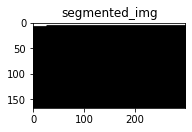

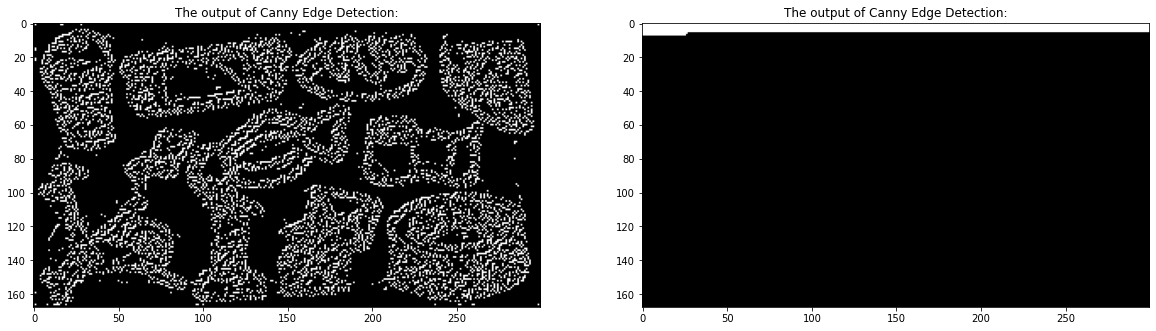

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
import sys






ret_ = np.zeros([m, n])


def region_growing(img, seed):
  #Parameters for region growing
  neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
  region_threshold = 0.2
  region_size = 1
  intensity_difference = 0
  neighbor_points_list = []
  neighbor_intensity_list = []
  
  #Mean of the segmented region
  region_mean = img[seed]

  #Input image parameters
  height, width = img.shape
  image_size = height * width

  #Initialize segmented output image
  segmented_img = np.zeros([m, n])

    #Region growing until intensity difference becomes greater than certain threshold
  while (intensity_difference < region_threshold) & (region_size < image_size):
    #Loop through neighbor pixels
    for i in range(4):
      #Compute the neighbor pixel position
      x_new = seed[0] + neighbors[i][0]
      y_new = seed[1] + neighbors[i][1]

            #Boundary Condition - check if the coordinates are inside the image
      check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < height) & (y_new < width)

            #Add neighbor if inside and not already in segmented_img
      if check_inside:
        if segmented_img[x_new, y_new] == 0:
          neighbor_points_list.append([x_new, y_new])
          neighbor_intensity_list.append(img[x_new, y_new])
          segmented_img[x_new, y_new] = 1
          #print("checking inside\n")

    #Add pixel with intensity nearest to the mean to the region
    distance = abs(neighbor_intensity_list-region_mean)
    pixel_distance = min(distance)
    index = np.where(distance == pixel_distance)[0][0]
    segmented_img[seed[0], seed[1]] = 1
    #print("adding pixel\n")
    region_size += 1

        #New region mean
    region_mean = (region_mean*region_size + neighbor_intensity_list[index])/(region_size+1)

        #Update the seed value
    seed = neighbor_points_list[index]
        #Remove the value from the neighborhood lists
    neighbor_intensity_list[index] = neighbor_intensity_list[-1]
    neighbor_points_list[index] = neighbor_points_list[-1]
  plt.subplot(1,2,2)
  plt.title('segmented_img')
  segmented_img = segmented_img.astype(np.uint8)
  plt.imshow(segmented_img, cmap='gray')
  return segmented_img




#boxes = []
ret_= np.zeros([m, n])
#resized = cv2.resize(sob_H_img,(256,256))
#cv2.namedWindow('input')
#cv2.setMouseCallback('input', on_mouse, 0,)
  #cv2_imshow(hyst_img)
  #cv2.waitKey()
print("Starting region growing")
  #seed = boxes[-1]
ret_= region_growing(vertical_img, (2,2) )
print("Done. Showing output now")

  #cv2.waitKey()
  #cv2.destroyAllWindows()
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1)
plt.title('The output of Canny Edge Detection:')
  
plt.imshow(hyst_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('The output of Canny Edge Detection:')
ret_ = ret_.astype(np.uint8)
plt.imshow(ret_, cmap='gray')
